In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def get_true_counts(link):
    f=open(link)
    counts = dict()
    for l in f.readlines():
        curr_id, count = l.split('\t')
        counts[int(curr_id)]=int(count)
    return counts

def get_hash_params(link,n_hash=5):
    f= open(link)
    params = []
    for idx,l in enumerate(f.readlines()):
        params.append([int(b) for b in l.split('\t')])
        if idx+1 == n_hash:
            break
    return params

def setup_buckets(funcs, n_buckets=10000):
    buckets = dict()
    for f in funcs:
        buckets[tuple(f)] = np.zeros(n_buckets)
    return buckets
    

def do_hash(f, val,p=123457,n_buckets=10000):
    a,b = f
    y = val % p
    h_val = (a * y + b) %  p
    return h_val % n_buckets
        
def add_to_buckets(funcs,val):
    for f in funcs.keys():
        idx = do_hash(f,val)
        funcs[f][idx]+=1
        
def get_f_tilde(funcs,val): #defined as the minimum over the buckets val mapped to for each hash function
    counts = []
    for f in funcs.keys():
        idx = do_hash(f,val)
        counts += [funcs[f][idx]]
    return min(counts)
        
def error(true, pred):
    err = (pred-true)/true
    return err
    

In [51]:
funcs = get_hash_params('./data/hash_params.txt')
true_counts = get_true_counts('./data/counts.txt')


In [52]:
total_count = sum(true_counts.values())

In [53]:
buckets = setup_buckets(funcs)

In [54]:
with open('./data/words_stream.txt')as f: #this fills our buckets
    for line in f:
        add_to_buckets(buckets,int(line))
        

In [65]:
abs_errors = []
rel_errors= []
for idx,count in true_counts.items(): #get the relative and absolute error here
    f_til = get_f_tilde(buckets,idx)
    abs_errors += [count/total_count]        
    rel_errors += [error(count,f_til)]

In [91]:
max(rel_errors)

8611393.0

Text(0.5, 1.0, 'Relative Error vs. Exact Word Frequency')

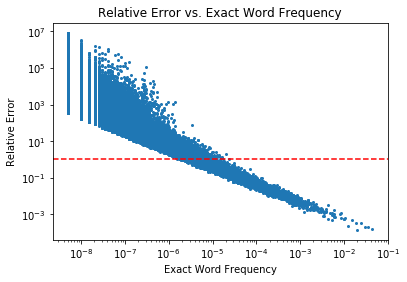

In [101]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(abs_errors,rel_errors, s=4)
plt.xlabel('Exact Word Frequency')
plt.ylabel('Relative Error')
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Relative Error vs. Exact Word Frequency')